In [109]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold 
from sklearn.preprocessing import binarize
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import instructions
import handling_outliers as ho

In [110]:
path = os.path.split(os.getcwd())
data_directory = os.path.join(path[0], 'data\\raw')
#data_directory = os.path.join(os.getcwd(), 'data\\raw')


X = instructions.load_csv(data_directory, 'train_data')
y = instructions.load_csv(data_directory, 'train_labels')

In [111]:
y_binar = binarize(y)
y = pd.DataFrame(np.ravel(y_binar))

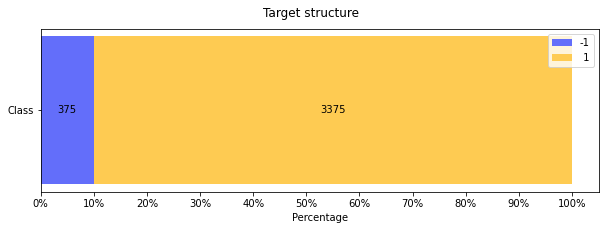

In [101]:
y_total = [y_0, y_1]

fig, ax = plt.subplots(figsize=(10, 3))

ax.barh("Class", y_0, label='-1', color='#636EFA')

ax.barh("Class", y_1, left=y_0, label=' 1', color='#FECB52')

plt.xticks(np.arange(0, 3751, 375))
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x/3750) for x in vals])
ax.legend()

for c in ax.containers:
    ax.bar_label(c, label_type='center', color='black')


ax.set_xlabel('Percentage')
fig.suptitle('Target structure')

plt.savefig('target_distribution.jpg')
plt.show()

In [300]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

fig = px.scatter(X_pca, x=0, y=1, color=y[0])
fig.show()

In [288]:
kpca_1d = KernelPCA(n_components=1, kernel="poly")

X_kpca_1d = kpca_1d.fit_transform(X)

X_kpca_1d.shape

(3750, 1)

In [289]:
fig = px.scatter(X_kpca_1d, x=0, y=y[0], color=y[0])
fig.show()

In [398]:
kpca_2d = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=0.001, eigen_solver='auto')

X_kpca_2d = kpca_2d.fit_transform(X)

X_kpca_2d.shape

(3750, 2)

In [399]:
import plotly.express as px

fig = px.scatter(X_kpca_2d, x=0, y=1, color=y[0])
fig.show()

In [336]:
kpca_3d = KernelPCA(n_components=3, kernel="poly", degree=3)
X_kpca_3d = kpca_3d.fit_transform(X)

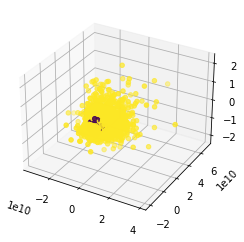

In [337]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_kpca_3d[:,1],X_kpca_3d[:,0], X_kpca_3d[:,2], c=y[0])

In [6]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

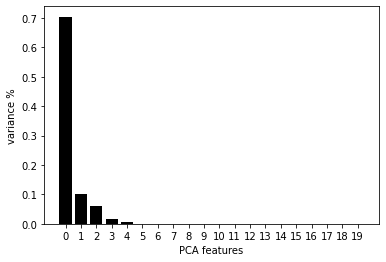

In [112]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

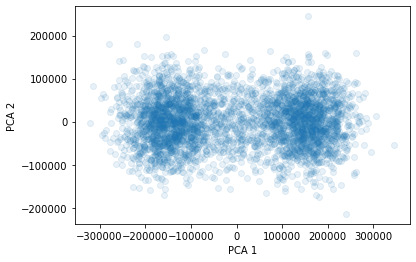

In [113]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)#, c=y[0])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

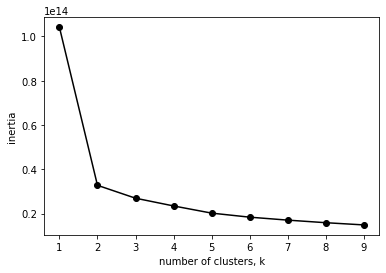

In [71]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

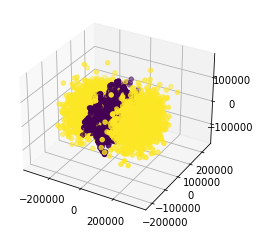

In [13]:
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0],PCA_components[1], PCA_components[2], c=y_sm[0])

In [154]:
# normal distribution test

from scipy.stats import normaltest

stat, p = normaltest(X)
stat, p

normal = 0
not_normal = 0

# hipothesis : x comes from a normal distribution

for i in p:
    if i < 0.05:
        not_normal += 1 # hypothesis can be rejected
    else:
        normal += 1 # hypothesis can not be rejected

normal, not_normal

(9490, 510)

In [145]:
p

array([0.82425654, 0.65432097, 0.98708188, ..., 0.08635164, 0.4635971 ,
       0.80054311])

In [19]:
#standarization

scaler = RobustScaler()
X_scal = scaler.fit_transform(pd.DataFrame(X))

In [96]:
X_copy = X.copy()

In [62]:
X_rem = ho.removing_iqr(pd.DataFrame(X_copy))

In [124]:
contamination = X_rem.sum().sum() / (X_rem.shape[0] * X_rem.shape[1])

In [125]:
contamination

0.007063386666666667

In [104]:
masked = ho.mask_outliers(X_copy, X_rem)

In [106]:
replaced = ho.replace_missing_values(masked, 5)

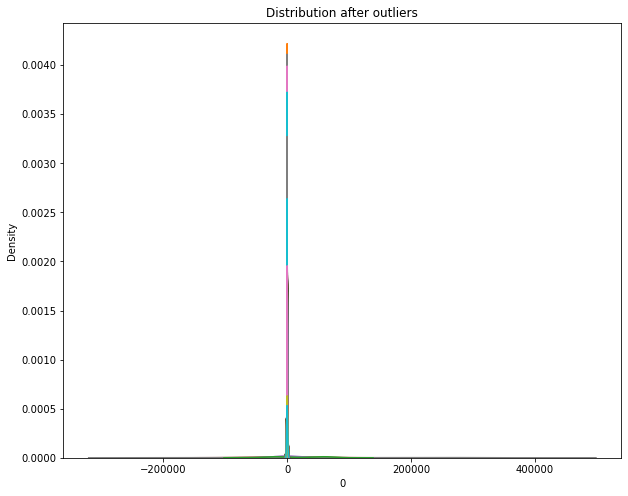

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribution after outliers')

for i in replaced:
    sns.kdeplot(replaced[i], ax=ax1)

In [108]:
y_binar = binarize(y)
y = pd.DataFrame(np.ravel(y_binar))

In [109]:
# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=0.95, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(replaced)
X_pca = pd.DataFrame(X_pca)

In [141]:
replaced

0        1          2          3          4         5         6     \
0     304.3610 -436.590 -33854.769 -96571.569 -15086.947  -794.409  -442.859   
1      54.0470   90.087   -154.747  -4116.486  38365.133  -589.309  1115.367   
2     272.1680 -201.736   4212.592  -9123.655 -35422.458 -1029.249  -506.290   
3     170.0070   68.736  48662.079  29735.235 -13903.955   895.081  -257.748   
4      86.7970  180.052 -49643.545   2515.406  26206.315  -407.453  -189.416   
...        ...      ...        ...        ...        ...       ...       ...   
3745  338.5390  -98.216 -37488.883  -2346.403   -291.325   553.155  1041.511   
3746  105.5110 -167.468  54447.468 -38055.924 -12394.035   711.218   100.459   
3747   93.1860 -155.288 -16555.534 -10605.421  -3027.792   -80.498 -2201.598   
3748  103.6948   98.182 -39429.721  26215.357  -1465.352  -340.496  -992.109   
3749 -169.3940  127.276 -24661.781  37020.744 -17491.827    46.510   560.459   

          7         8        9     ...     9990      9991     9992     9993  \
0      304.248  -202.411 -506.852  ...   95.294    -3.936 -251.812  256.429   
1      274.199   814.953  167.272  ... -176.341  -426.238 -542.428   99.147   
2     -476.856  -570.731 -161.288  ...  321.426  -376.033  142.834  920.958   
3     -811.058  -691.561  -31.439  ... -409.919   400.946  313.270  123.172   
4      -53.664  -159.507  -42.291  ... -101.761  -424.898   37.254 -337.431   
...        ...       ...      ...  ...      ...       ...      ...      ...   
3745   391.664  1016.730   49.772  ...  350.501  -607.873  430.407 -469.737   
3746 -1377.005  -171.175 -325.444  ...    4.759    -9.079  104.333    4.676   
3747   -49.392  -848.946 -252.714  ... -342.855  -151.956    7.386  564.910   
3748   990.646   140.943 -281.100  ...  200.827 -1445.572  -39.879  421.075   
3749   155.117  -217.523 -448.290  ...  -87.249  -419.265  224.068  -75.648   

          9994      9995     9996      9997     9998      9999  
0     -473.661 -1398.604   42.638   771.185 -191.123  1356.137  
1     -102.309  -277.948  -98.859 -1163.779  265.231  -992.056  
2     -122.525  -174.304 -137.612 -1571.473  678.323  1020.263  
3     1786.962   147.637   31.433  -784.719  573.433  1454.415  
4      423.691    14.240  267.352  -234.560 -213.804   873.391  
...        ...       ...      ...       ...      ...       ...  
3745    68.670   328.636  105.448  -368.834  378.017  -253.044  
3746 -1069.879   -92.252   86.110    -4.935  433.674  -355.118  
3747   613.541  -570.735   -5.810   797.659 -289.170   -91.306  
3748  -191.389  -538.616  141.365   552.974  310.130   207.084  
3749  -302.584  -164.119   19.465  -841.065 -973.910  -803.150  

[3750 rows x 10000 columns]

In [158]:
from scipy.stats import normaltest

stat, p = normaltest(replaced)
stat, p

normal = 0
not_normal = 0

# hypothesis : x comes from a normal distribution

for i in p:
    if i < 0.05:
        not_normal += 1 # hypothesis can be rejected
    else:
        normal += 1 # hypothesis can not be rejected

normal, not_normal

(26, 9974)

In [72]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [73]:
pipe = Pipeline(steps=[("classifier", LogisticRegression())])

In [10]:
model_params = {
    'svm' : {
        'model' : SVC(kernel='linear'),
        'params' : {
            'C' : [1, 10, 20],
            'gamma' : ['scale', 'auto'],
            'class_weight' : ['balanced']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10, 100, 1000],
            'max_features' : ['auto', 'sqrt', 'log2', 'none'],
            'class_weight' : ['balanced']
        }
    },
 #   'logistic_regression' : {
  #      'model' : LogisticRegression(solver = 'liblinear', multi_class='auto'),
   #     'params' : {
    #        'C' : np.linspace(1, 5, 10),
     #       'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
      #      'class_weight' : ['balanced']
       # }
   # },
    'bernoulliNB' : {
        'model' : BernoulliNB(),
        'params' : {
            'alpha' : np.linspace(1, 10, 100)
        }
    },
    'KN_neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'kd-tree', 'brute'],
            'n_neighbors' : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
        }
    },
    'MLP' : {
        'model' : MLPClassifier(),
        'params' : {}
    },
    'Decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'max_features' : ['auto', 'sqrt', 'log2', 'none'],
            'class_weight' : ['balanced']
        }
    },
    'extra_tree' : {
        'model' : ExtraTreesClassifier(),
        'params' : {
            'n_estimators' : [10, 100, 1000],
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'max_features' : ['sqrt', 'log2', 'none'],
            'class_weight' : ['balanced']
        }
    }
}

In [74]:
search_space = [{"classifier" : [RandomForestClassifier()],
                "classifier__n_estimators" : [10, 100, 1000],
                "classifier__max_features" : ['auto', 'sqrt', 'log2', 'none'],
                "classifier__class_weight" : ['balanced']},
                {"classifier" : [KNeighborsClassifier()],
                "classifier__weights" : ['uniform', 'distance'],
                "classifier__algorithm" : ['auto', 'kd-tree', 'brute'],
                "classifier__n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
                {"classifier" : [SVC()],
                "classifier__kernel" : ['linear'],
                "classifier__C" : [np.logspace(1, 10000, 1000)],
                "classifier__class_weight" : ['balanced']},
                {"classifier" : [MLPClassifier()]},
                {"classifier" : [DecisionTreeClassifier()],
                "classifier__criterion" : ['gini', 'entropy', 'log_loss'],
                "classifier__splitter" : ['best', 'random'],
                "classifier__max_features" : ['auto', 'sqrt', 'log2', 'none'],
                "classifier__class_weight" : ['balanced']},
                {"classifier" : [ExtraTreesClassifier()],
                "classifier__n_estimators" : [10, 100, 1000],
                "classifier__criterion" : ['gini', 'entropy', 'log_loss'],
                "classifier__max_features" : ['sqrt', 'log2', 'none'],
                "classifier__class_weight" : ['balanced']}]

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\numpy\core\function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


In [11]:
scores = []

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], scoring = 'balanced_accuracy', cv = cv)
  clf.fit(X_pca, y_sm.values.flatten())
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [34]:
scores

[{'model': 'KN_neighbors',
  'best_score': 0.504352186550435,
  'best_params': {'algorithm': 'auto',
   'n_neighbors': 3,
   'weights': 'uniform'}},
 {'model': 'MLP', 'best_score': 0.4988623231685379, 'best_params': {}},
 {'model': 'Decision_tree',
  'best_score': 0.5102591770058341,
  'best_params': {'class_weight': {0: 1, 1: 9},
   'criterion': 'gini',
   'max_features': 'auto',
   'splitter': 'random'}},
 {'model': 'extra_tree',
  'best_score': 0.5019649613424767,
  'best_params': {'class_weight': {0: 1, 1: 9},
   'criterion': 'gini',
   'max_features': 'sqrt',
   'n_estimators': 10}}]

In [75]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

In [76]:
search = GridSearchCV(pipe, search_space, cv=rskf, scoring="balanced_accuracy", refit=True, verbose=3)

In [78]:
result = search.fit(X_pca, y.values.flatten())

Fitting 30 folds for each of 125 candidates, totalling 3750 fits
[CV 1/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.789 total time=   0.0s
[CV 2/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.800 total time=   0.0s
[CV 3/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.807 total time=   0.0s
[CV 4/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.832 total time=   0.0s
[CV 5/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.871 total time=   0.0s
[CV 6/30] END classifier=RandomForestClassifi

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1530 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\ensemble\_forest.py", li

In [79]:
result.best_estimator_, result.best_params_, result.best_score_

(Pipeline(steps=[('classifier',
                  KNeighborsClassifier(n_neighbors=15, weights='distance'))]),
 {'classifier': KNeighborsClassifier(n_neighbors=15, weights='distance'),
  'classifier__algorithm': 'auto',
  'classifier__n_neighbors': 15,
  'classifier__weights': 'distance'},
 0.845366450247876)

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

#clf = ExtraTreesClassifier(class_weight='balanced', max_features='sqrt', criterion='gini', n_estimators=100)

clf = KNeighborsClassifier(weights='distance', n_neighbors=15, algorithm='auto')

clf.fit(X_sm, y_sm.values.flatten())
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(array([[112,   1],
        [179, 833]], dtype=int64),
 0.9071364860610724)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#sm = SMOTE()
#X_sm, y_sm = sm.fit_resample(X_train, y_train)

#clf = ExtraTreesClassifier(class_weight='balanced', max_features='sqrt', criterion='gini', n_estimators=100)

clf = KNeighborsClassifier(weights='distance', n_neighbors=15, algorithm='auto')

clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(array([[ 89,  24],
        [ 17, 995]], dtype=int64),
 0.8854061002483473)

In [96]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9101009129385428

In [80]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [81]:
result_2 = search.fit(X_pca, y.values.flatten())

Fitting 30 folds for each of 125 candidates, totalling 3750 fits
[CV 1/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.820 total time=   0.0s
[CV 2/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.937 total time=   0.0s
[CV 3/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.889 total time=   0.0s
[CV 4/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.918 total time=   0.0s
[CV 5/30] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.862 total time=   0.0s
[CV 6/30] END classifier=RandomForestClassifi

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1530 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\ensemble\_forest.py", li

In [82]:
result_2.best_estimator_, result_2.best_params_, result_2.best_score_

(Pipeline(steps=[('classifier',
                  RandomForestClassifier(class_weight='balanced',
                                         max_features='log2',
                                         n_estimators=10))]),
 {'classifier': RandomForestClassifier(class_weight='balanced', max_features='log2',
                         n_estimators=10),
  'classifier__class_weight': 'balanced',
  'classifier__max_features': 'log2',
  'classifier__n_estimators': 10},
 0.8940593983158166)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#sm = SMOTE()
#X_sm, y_sm = sm.fit_resample(X_train, y_train)

#clf = ExtraTreesClassifier(class_weight='balanced', max_features='sqrt', criterion='gini', n_estimators=100)

clf = RandomForestClassifier(class_weight='balanced', max_features='log2', n_estimators=10)

clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[   0,  113],
       [   1, 1011]], dtype=int64)

In [88]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.49950592885375494

In [83]:
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X)

In [84]:
result_3 = search.fit(X_pca, y.values.flatten())

Fitting 30 folds for each of 125 candidates, totalling 3750 fits
[CV 1/30] END classifier=RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=10), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.500 total time=   0.9s
[CV 2/30] END classifier=RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=10), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.500 total time=   1.0s
[CV 3/30] END classifier=RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=10), classifier__class_weight=balanced, classifier__max_features=auto, classifier__n_estimators=10;, score=0.514 total time=   0.9s
[CV 4/30] END classifier=RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=10), classifier__cl

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1530 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\ensemble\_forest.py", li

In [85]:
result_3.best_estimator_, result_3.best_params_, result_3.best_score_

(Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=9))]),
 {'classifier': KNeighborsClassifier(n_neighbors=9),
  'classifier__algorithm': 'auto',
  'classifier__n_neighbors': 9,
  'classifier__weights': 'uniform'},
 0.8686771354487212)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#sm = SMOTE()
#X_sm, y_sm = sm.fit_resample(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')

clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)

#clf.score(X_test, y_test)

confusion_matrix(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(array([[ 88,  25],
        [ 17, 995]], dtype=int64),
 0.8809813214872853)

In [100]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

clf = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')

clf.fit(X_sm, y_sm.values.flatten())
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)

(array([[112,   1],
        [179, 833]], dtype=int64),
 0.9071364860610724)